# Google Drive

In [1]:
# Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Libraries

In [2]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import manifold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.linalg import eigh 
from scipy.spatial import distance
from scipy.special import rel_entr
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial import distance
import random
random.seed(10)

# Download Dataset

In [ ]:
# Installations
!pip3 install mnist

# Data Import

In [ ]:
# Import test dataset
mnist_test = pd.read_csv("/content/drive/MyDrive/📚-MBCI/Semestre 1/Matemáticas y Estadística/mnist/mnist_test.csv")

In [ ]:
# Data exploration
print("Type: "+str(type(mnist_test)))
print("Shape: "+str(mnist_test.shape))

Type: <class 'pandas.core.frame.DataFrame'>
Shape: (9999, 785)


In [3]:
# Import small dataset
mnist_small = pd.read_csv("/content/drive/MyDrive/📚-MBCI/Semestre 1/Matemáticas y Estadística/mnist/mnist_train_small.csv", index_col=False)

In [ ]:
# Data exploration
print("Type: "+str(type(mnist_small)))
print("Shape: "+str(mnist_small.shape))

Type: <class 'pandas.core.frame.DataFrame'>
Shape: (19999, 785)


# Data Pre-processing

In [ ]:
# Print first 5 rows
mnist_small.head(7)

6  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.581  0.582  0.583  \
0  5  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  7  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  9  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  5  0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  2  0    0    0    0    0    0    0    0    0  ...      0      0      0   
5  0  0    0    0    0    0    0    0    0    0  ...      0      0      0   
6  6  0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.584  0.585  0.586  0.587  0.588  0.589  0.590  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  
5      0      0      0      0      0      0      0  
6      0      0      0      0      0      0      0  

[7 rows x 785 columns]

In [4]:
# Data Processing

# y_data
y_data = mnist_small['6'] # labels into variable "y_data"
print("y_data type: "+str(type(y_data)))
print("y_data shape: "+str(y_data.shape))

# x_data
x_data = mnist_small.drop("6",axis=1)
print("x_data type: "+str(type(x_data)))
print("x_data shape: "+str(x_data.shape))

y_data type: <class 'pandas.core.series.Series'>
y_data shape: (19999,)
x_data type: <class 'pandas.core.frame.DataFrame'>
x_data shape: (19999, 784)


[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 152 254 166
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0 239 253 253   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   8 240
 253 253   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0  15 191 253 253 182   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 163
 253 253 240  73   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0  54 232 253 253 190   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 154 253 253 205  28   0   0   0   0   0   0   0   

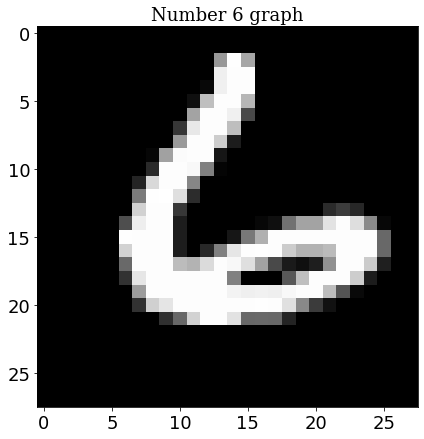

In [ ]:
# Plot a number.
plt.figure(figsize=(7,7))
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 18,
        }
idx = 100
#print("DataFrame")
#print(x_data.iloc[idx])
data_aux = x_data.iloc[idx].to_numpy() # converts DataFrame to numpy array
#print("Numpy array (784,)")
print(data_aux)
print(data_aux.shape)
grid_data = data_aux.reshape(28,28)  # reshapes from 1D to 2D pixel array
#print("Numpy array (28,28)")
print(grid_data.shape)
plt.title("Number "+str(y_data[idx])+" graph", fontdict=font)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

# Data Processing

## Standard Scaler

In [ ]:
# Standard Scaler
Data_Standard = StandardScaler().fit_transform(x_data)
print("Data_Standard type: "+str(type(Data_Standard)))
print("Data_Standard shape: "+str(Data_Standard.shape))

Data_Standard type: <class 'numpy.ndarray'>
Data_Standard shape: (19999, 784)


## Embeddings

In [ ]:
# PCA
PCA_Transform = PCA(n_components=3)
X_reduced = PCA_Transform.fit_transform(Data_Standard)

In [ ]:
# TSNE
T_SNE = manifold.TSNE(n_components=3, init="pca", random_state=0)
T_SNE_Data = T_SNE.fit_transform(Data_Standard)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


KeyboardInterrupt: ignored

In [ ]:
#LLE
LLE = manifold.LocallyLinearEmbedding(n_components=3, n_neighbors=5,
eigen_solver="auto")
LLE_Data = LLE.fit_transform(Data_Standard)

In [ ]:
#LDA
LDA_low = LDA(n_components=3)
LDA_Data = LDA_low.fit_transform(Data_Standard, y_data)

In [ ]:
## LDA 
open_file = open(path_results + "LDA_EMbedding_c3.pkl", "wb")
pickle.dump(LDA_Data, open_file)
open_file.close()

## Save results

In [ ]:
# Results directory
path_results = "/content/drive/MyDrive/📚-MBCI/Semestre 1/Matemáticas y Estadística/mnist/Results/embeddings/"

# Save Embeddings
## Data_Standard
open_file = open(path_results + "Data_Standard.pkl", "wb")
pickle.dump(Data_Standard, open_file)
open_file.close()

## PCA Embedding
open_file = open(path_results + "PCA_Embedding.pkl", "wb")
pickle.dump(X_reduced, open_file)
open_file.close()
## TSNE Embedding
open_file = open(path_results + "TSNE_Embedding.pkl", "wb")
pickle.dump(T_SNE_Data, open_file)
open_file.close()
## LLE Embedding
open_file = open(path_results + "LLE_Embedding.pkl", "wb")
pickle.dump(LLE_Data, open_file)
open_file.close()
## LDA Embedding
open_file = open(path_results + "LDA_Embedding.pkl", "wb")
pickle.dump(LDA_Data, open_file)
open_file.close()

# Save Models
## PCA 
open_file = open(path_results + "PCA_Model_3_components.pkl", "wb")
pickle.dump(PCA_Transform, open_file)
open_file.close()
## TSNE 
open_file = open(path_results + "TSNE_Model_3_components.pkl", "wb")
pickle.dump(T_SNE, open_file)
open_file.close()
## LLE 
open_file = open(path_results + "LLE_Model_3_components.pkl", "wb")
pickle.dump(LLE, open_file)
open_file.close()
## LDA 
open_file = open(path_results + "LDA_Model_2_components.pkl", "wb")
pickle.dump(LDA_low, open_file)
open_file.close()

NameError: ignored

In [ ]:
# Make sure files are readable
filename1 = "/content/drive/MyDrive/📚-MBCI/Semestre 1/Matemáticas y Estadística/mnist/Results/Data_Standard.pkl"
pickleFile1 = open(filename1, 'rb')
standard = pickle.load(pickleFile1)

filename2 = "/content/drive/MyDrive/📚-MBCI/Semestre 1/Matemáticas y Estadística/mnist/Results/PCA_Model_3_components.pkl"
pickleFile2 = open(filename2, 'rb')
pca_model = pickle.load(pickleFile2)

print("Standard_Scaler shape: "+str(standard.shape))
print("pca_model type: "+str(type(pca_model)))
pickleFile1.close()
pickleFile2.close()

# Plot Figure

In [ ]:
# LDA
lda_file = "/content/drive/MyDrive/📚-MBCI/Semestre 1/Matemáticas y Estadística/mnist/Results/embeddings/LDA_Embedding_c3.pkl"
lda_pickle = open(lda_file, 'rb')
LDA_Data = pickle.load(lda_pickle)

In [6]:
# Data import

# Data Standard
std_file = "/content/drive/MyDrive/📚-MBCI/Semestre 1/Matemáticas y Estadística/mnist/Results/embeddings/Data_Standard.pkl"
std_pickle = open(std_file, 'rb')
Data_Standard = pickle.load(std_pickle)

# PCA
pca_file = "/content/drive/MyDrive/📚-MBCI/Semestre 1/Matemáticas y Estadística/mnist/Results/embeddings/PCA_Embedding.pkl"
pca_pickle = open(pca_file, 'rb')
X_reduced = pickle.load(pca_pickle)

# LDA
lda_file = "/content/drive/MyDrive/📚-MBCI/Semestre 1/Matemáticas y Estadística/mnist/Results/embeddings/LDA_Embedding_c3.pkl"
lda_pickle = open(lda_file, 'rb')
LDA_Data = pickle.load(lda_pickle)

# LLE
lle_file = "/content/drive/MyDrive/📚-MBCI/Semestre 1/Matemáticas y Estadística/mnist/Results/embeddings/LLE_Embedding.pkl"
lle_pickle = open(lle_file, 'rb')
LLE_Data = pickle.load(lle_pickle)

# TSNE
TSNE_file = "/content/drive/MyDrive/📚-MBCI/Semestre 1/Matemáticas y Estadística/mnist/Results/embeddings/TSNE_Embedding.pkl"
TSNE_pickle = open(TSNE_file, 'rb')
T_SNE_Data = pickle.load(TSNE_pickle)

In [ ]:
# Color indexing
label_color_dict = {0:"blue", 1:"green", 2:"red", 3:"cyan", 4:"magenta",\
                    5:"yellow", 6:"black", 7:"white", 8:"orange",9:"palegreen"}
cvec = [label_color_dict[label] for label in y_data]
print(y_data)
print(cvec)

0        5
1        7
2        9
3        5
4        2
        ..
19994    0
19995    1
19996    2
19997    9
19998    5
Name: 6, Length: 19999, dtype: int64
['yellow', 'white', 'palegreen', 'yellow', 'red', 'blue', 'black', 'yellow', 'yellow', 'red', 'white', 'white', 'black', 'orange', 'palegreen', 'cyan', 'yellow', 'white', 'black', 'palegreen', 'magenta', 'cyan', 'magenta', 'palegreen', 'red', 'palegreen', 'green', 'cyan', 'palegreen', 'white', 'white', 'yellow', 'orange', 'black', 'green', 'white', 'red', 'white', 'orange', 'orange', 'white', 'green', 'cyan', 'white', 'magenta', 'green', 'green', 'palegreen', 'red', 'palegreen', 'red', 'blue', 'palegreen', 'white', 'orange', 'red', 'blue', 'red', 'black', 'cyan', 'yellow', 'black', 'red', 'orange', 'black', 'yellow', 'black', 'red', 'black', 'orange', 'orange', 'white', 'blue', 'magenta', 'blue', 'orange', 'orange', 'white', 'palegreen', 'palegreen', 'blue', 'cyan', 'green', 'red', 'white', 'red', 'green', 'green', 'red', 'magenta

In [7]:
# Labels
label = y_data
u_fig_labels = np.unique(label)
u_fig_labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

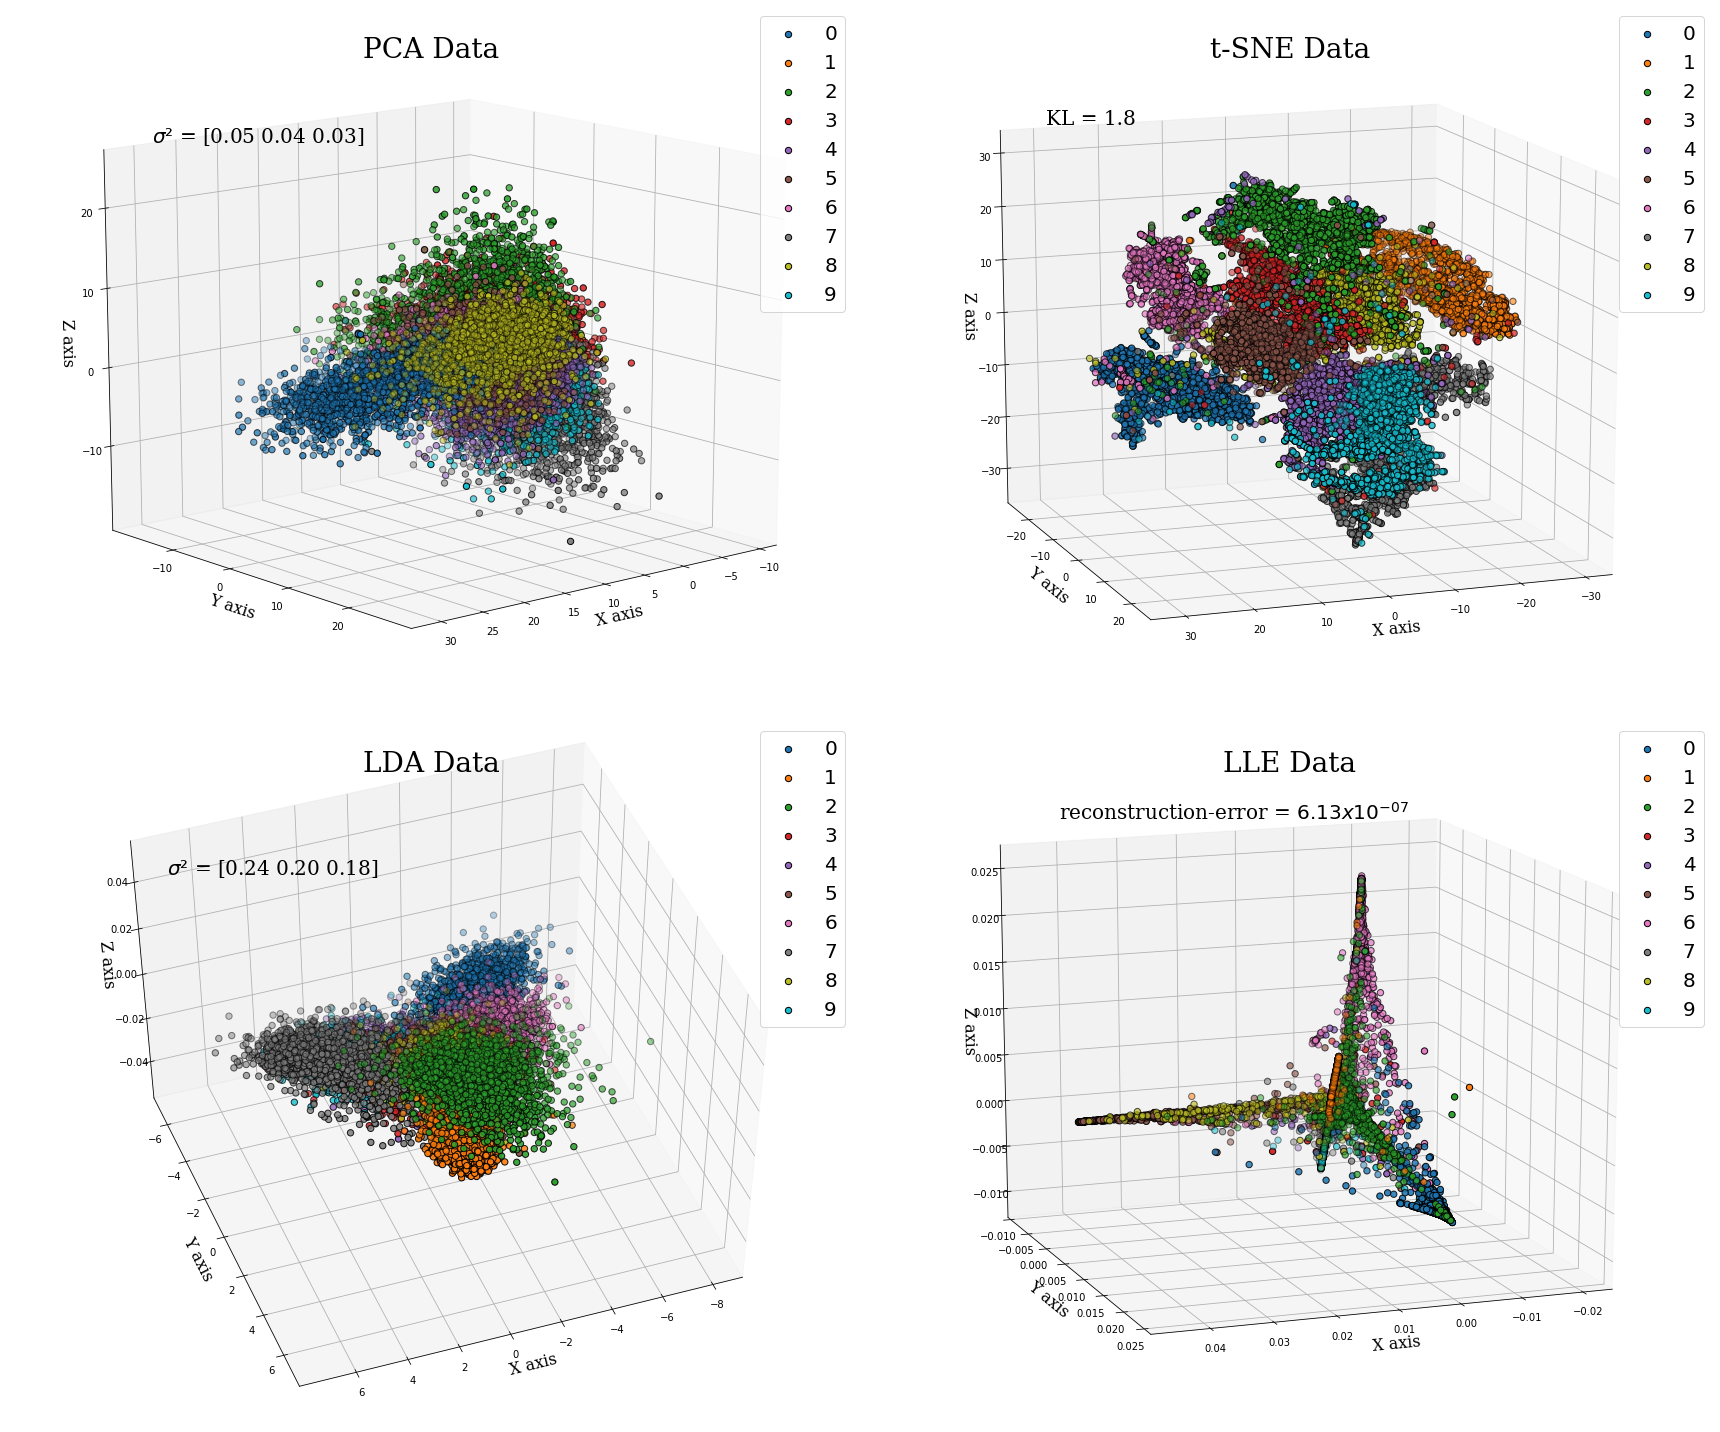

In [ ]:
from numpy.ma.core import size
# Plot
XY_plane = 15
Z_rotation = 70#45

XY_plane1 = 15
Z_rotation1 = 50

XY_plane2 = 50
Z_rotation2 = 70#45

font_titles = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 28,
        }

font_axis = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

font_text = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }

# PCA
fig = plt.figure(figsize=(24,20))
ax = fig.add_subplot(221, projection='3d')
for i in u_fig_labels:
    ax.scatter(X_reduced[label == i , 0] , X_reduced[label == i , 1] , X_reduced[label == i, 2], label = i,\
               cmap=plt.cm.Set1, edgecolor="k", s=40)
ax.legend(prop={'size':20})
#ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=cvec, cmap=plt.cm.Set1, edgecolor="k", s=40)
plt.title('PCA Data', fontdict=font_titles)
ax.text(35,-10, 30, "$\sigma²$ = [0.05 0.04 0.03]", color='black', fontdict=font_text)
ax.view_init(XY_plane1, Z_rotation1)
ax.set_xlabel('X axis', fontdict=font_axis)
ax.set_ylabel('Y axis', fontdict=font_axis)
ax.set_zlabel('Z axis', fontdict=font_axis)
plt.draw()

# TSNE
ax_1 = fig.add_subplot(222, projection='3d')
for i in u_fig_labels:
  ax_1.scatter(T_SNE_Data[label == i , 0], T_SNE_Data[label == i , 1], T_SNE_Data[label == i , 2], \
               label = i, cmap=plt.cm.Set1, edgecolor="k", s=40)
ax_1.legend(prop={'size':20})
#ax_1.scatter(T_SNE_Data[:, 0], T_SNE_Data[:, 1], T_SNE_Data[:, 2], c=cvec, cmap=plt.cm.Set1, edgecolor="k", s=40)
plt.title('t-SNE Data', fontdict=font_titles)
ax_1.text(35,-10, 40, "KL = 1.8", color='black', fontdict=font_text)
ax_1.view_init(XY_plane, Z_rotation)
ax_1.set_xlabel('X axis', fontdict=font_axis)
ax_1.set_ylabel('Y axis', fontdict=font_axis)
ax_1.set_zlabel('Z axis', fontdict=font_axis)
plt.draw()

# LDA
ax_3 = fig.add_subplot(223, projection='3d')
for i in u_fig_labels:
  ax_3.scatter(LDA_Data[label == i , 0], LDA_Data[label == i , 1], \
               label = i, cmap=plt.cm.Set1, edgecolor="k", s=40)
ax_3.legend(prop={'size':20})
#ax_3.scatter(LDA_Data[:, 0], LDA_Data[:, 1], c=cvec, cmap=plt.cm.Set1, edgecolor="k", s=40)
plt.title('LDA Data', fontdict=font_titles)
ax_3.text(8,-4, 0.07, "$\sigma²$ = [0.24 0.20 0.18]", color='black', fontdict=font_text)
ax_3.view_init(XY_plane2, Z_rotation2)
ax_3.set_xlabel('X axis', fontdict=font_axis)
ax_3.set_ylabel('Y axis', fontdict=font_axis)
ax_3.set_zlabel('Z axis', fontdict=font_axis)
plt.draw()

# LLE
ax_2 = fig.add_subplot(224, projection='3d')
for i in u_fig_labels:
  ax_2.scatter(LLE_Data[label == i , 0], LLE_Data[label == i , 1], LLE_Data[label == i , 2], \
               label = i, cmap=plt.cm.Set1, edgecolor="k", s=40)
ax_2.legend(prop={'size':20})
#ax_2.scatter(LLE_Data[:, 0], LLE_Data[:, 1], LLE_Data[:, 2], c=cvec, cmap=plt.cm.Set1, edgecolor="k", s=40)
plt.title('LLE Data', fontdict=font_titles)
ax_2.text(0.04,-0.010, 0.03, "reconstruction-error = $6.13x10^{-07}$", color='black', fontdict=font_text)
ax_2.view_init(XY_plane, Z_rotation)
ax_2.set_xlabel('X axis', fontdict=font_axis)
ax_2.set_ylabel('Y axis', fontdict=font_axis)
ax_2.set_zlabel('Z axis', fontdict=font_axis)
plt.draw()
plt.tight_layout()
plt.show()


path_results = "/content/drive/MyDrive/📚-MBCI/Semestre 1/Matemáticas y Estadística/mnist/Results/"
fig.savefig(path_results + 'Embeddings_updated_v4', bbox_inches='tight')

# Divergence/Variance Analysis

In [ ]:
# Data import

# PCA
pca_file = "/content/drive/MyDrive/📚-MBCI/Semestre 1/Matemáticas y Estadística/mnist/Results/models/PCA_Model_3_components.pkl"
pca_pickle = open(pca_file, 'rb')
PCA_Transform = pickle.load(pca_pickle)

# LDA
lda_file = "/content/drive/MyDrive/📚-MBCI/Semestre 1/Matemáticas y Estadística/mnist/Results/models/LDA_Model_3_components.pkl"
lda_pickle = open(lda_file, 'rb')
LDA_low = pickle.load(lda_pickle)

# LLE
lle_file = "/content/drive/MyDrive/📚-MBCI/Semestre 1/Matemáticas y Estadística/mnist/Results/models/LLE_Model_3_components.pkl"
lle_pickle = open(lle_file, 'rb')
LLE = pickle.load(lle_pickle)

# TSNE
TSNE_file = "/content/drive/MyDrive/📚-MBCI/Semestre 1/Matemáticas y Estadística/mnist/Results/models/TSNE_Model_3_components.pkl"
TSNE_pickle = open(TSNE_file, 'rb')
T_SNE = pickle.load(TSNE_pickle)

In [ ]:
#PCA
PCA_varianceData = PCA_Transform.explained_variance_ratio_
print(PCA_varianceData)

#TSNE
TSNE_KL_Divergence = T_SNE.kl_divergence_
print(TSNE_KL_Divergence)

#LLE
LLE_reconstructionError = LLE.reconstruction_error_
print(LLE_reconstructionError)

#LDA
LDA_varianceData = LDA_low.explained_variance_ratio_
print(LDA_varianceData)

[0.0590205  0.04282781 0.03885631]
1.8045581579208374
6.133375243189576e-07
[0.24005198 0.20019503 0.18023707]


## JS Distance Analysis

In [ ]:
# Data Import
# PCA
pca_file = "/content/drive/MyDrive/📚-MBCI/Semestre 1/Matemáticas y Estadística/mnist/Results/PCA_Model_3_components.pkl"
pca_pickle = open(pca_file, 'rb')
PCA = pickle.load(pca_pickle)

In [ ]:
X1, X2, X3 = PCA.components_

In [ ]:
# PCA
distance.jensenshannon(X3, X3)

inf

In [ ]:
distance.jensenshannon(T_SNE_Data[:, 0], T_SNE_Data[:, 1])

inf

## KL Divergence Analysis Attempt

In [ ]:
# Function
def kl_divergence(a, b):
    return sum(a[i] * np.log(a[i]/b[i]) for i in range(len(a)))

In [ ]:
X1 = list(X_reduced[:, 0])
X1

[2.003775239913704,
 3.7222434750657225,
 2.7132943041238153,
 3.884984272053003,
 4.080912143344819,
 17.01651944661363,
 -1.893023424091452,
 0.8463072754766605,
 2.9585801433546255,
 -1.1818486026430028,
 -3.0201278894753645,
 -0.8572512209779752,
 7.693393609539265,
 -5.037544993778951,
 -7.597149663367168,
 3.227562769723978,
 0.3610117554290142,
 -7.200850217971849,
 -6.383782802996128,
 -4.66025839839126,
 4.794452488959442,
 -1.1475043344219347,
 -1.300857574125884,
 -5.44393801630988,
 3.945456738337873,
 8.835997695941755,
 -8.487019499771527,
 0.07147468094251318,
 -2.950972059355328,
 -7.125454614217414,
 -2.3937301495121,
 3.0788418702610962,
 -3.9120176518116923,
 2.2248922052703803,
 -7.567229633668811,
 -7.052133383280611,
 5.573772362866404,
 -7.591560838300143,
 -4.337535240501292,
 -7.067320009805814,
 -0.05500477320553498,
 -6.373647894063876,
 3.5678710100653013,
 -6.266963204722705,
 -1.981187651523082,
 -7.383546606240996,
 -6.742036560947361,
 -6.910595672298085

In [ ]:
X2 = list(X_reduced[:, 1])
X3 = list(X_reduced[:, 2])

In [ ]:
# PCA
box_1 = X1
box_2 = X2
box_3 = X3
    
print('KL-divergence(box_1 || box_2): %.3f ' % kl_divergence(box_1,box_2))
print('KL-divergence(box_2 || box_1): %.3f ' % kl_divergence(box_2,box_1))
  
# D( p || p) =0
print('KL-divergence(box_1 || box_1): %.3f ' % kl_divergence(box_1,box_1))
  
print("Using Scipy rel_entr function")
box_1 = np.array(box_1)
box_2 = np.array(box_2)
  
print('KL-divergence(box_1 || box_2): %.3f ' % sum(rel_entr(box_1,box_2)))
print('KL-divergence(box_2 || box_1): %.3f ' % sum(rel_entr(box_2,box_1)))
print('KL-divergence(box_1 || box_1): %.3f ' % sum(rel_entr(box_1,box_1)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


KL-divergence(box_1 || box_2): nan 
KL-divergence(box_2 || box_1): nan 
KL-divergence(box_1 || box_1): 0.000 
Using Scipy rel_entr function
KL-divergence(box_1 || box_2): inf 
KL-divergence(box_2 || box_1): inf 
KL-divergence(box_1 || box_1): inf 


In [ ]:
# TSNE
box_1 = T_SNE_Data[:, 0]
box_2 = T_SNE_Data[:, 1]
box_3 = T_SNE_Data[:, 2]
    
print('KL-divergence(box_1 || box_2): %.3f ' % kl_divergence(box_1,box_2))
print('KL-divergence(box_2 || box_1): %.3f ' % kl_divergence(box_2,box_1))
  
# D( p || p) =0
print('KL-divergence(box_1 || box_1): %.3f ' % kl_divergence(box_1,box_1))
  
print("Using Scipy rel_entr function")
box_1 = np.array(box_1)
box_2 = np.array(box_2)
  
print('KL-divergence(box_1 || box_2): %.3f ' % sum(rel_entr(box_1,box_2)))
print('KL-divergence(box_2 || box_1): %.3f ' % sum(rel_entr(box_2,box_1)))
print('KL-divergence(box_1 || box_1): %.3f ' % sum(rel_entr(box_1,box_1)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


KL-divergence(box_1 || box_2): nan 
KL-divergence(box_2 || box_1): nan 
KL-divergence(box_1 || box_1): 0.000 
Using Scipy rel_entr function
KL-divergence(box_1 || box_2): inf 
KL-divergence(box_2 || box_1): inf 
KL-divergence(box_1 || box_1): inf 


## Entropy Attempts

In [ ]:
# Entropy
PCA_entropy = entropy(X_reduced, qk=T_SNE_Data)
print(PCA_entropy)
TSNE_entropy = entropy(T_SNE_Data)
print(TSNE_entropy)

[inf inf inf]
[-inf -inf -inf]


# K-Means & Silhouette Coefficient Analysis

## PCA

In [10]:
# Instantiate the KMeans models
km = KMeans(n_clusters=10, random_state=42)
# Fit the KMeans model
km.fit_predict(X_reduced)
# Calculate Silhoutte Score
score = silhouette_score(X_reduced, km.labels_, metric='euclidean')
# Print the score
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.281


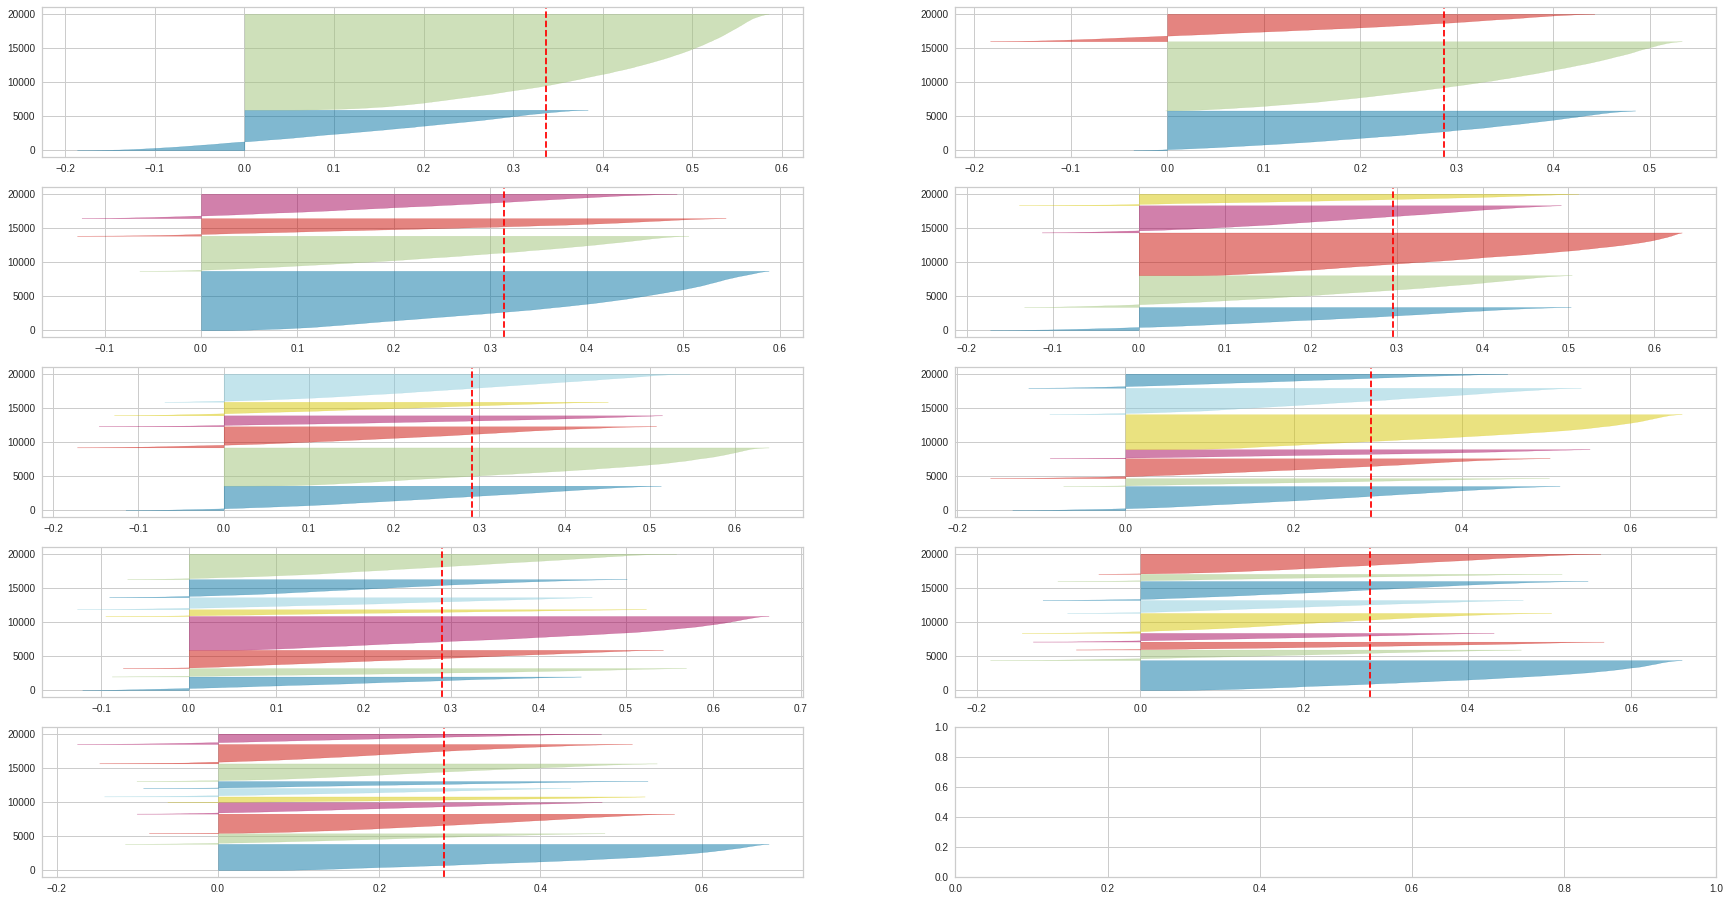

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(5, 2, figsize=(30,16))
for i in [2,3,4,5,6,7,8,9,10]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_reduced)

## TSNE

In [11]:
# Instantiate the KMeans models
km = KMeans(n_clusters=10, random_state=42)
# Fit the KMeans model
km.fit_predict(T_SNE_Data)
# Calculate Silhoutte Score
score = silhouette_score(T_SNE_Data, km.labels_, metric='euclidean')
# Print the score
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.324


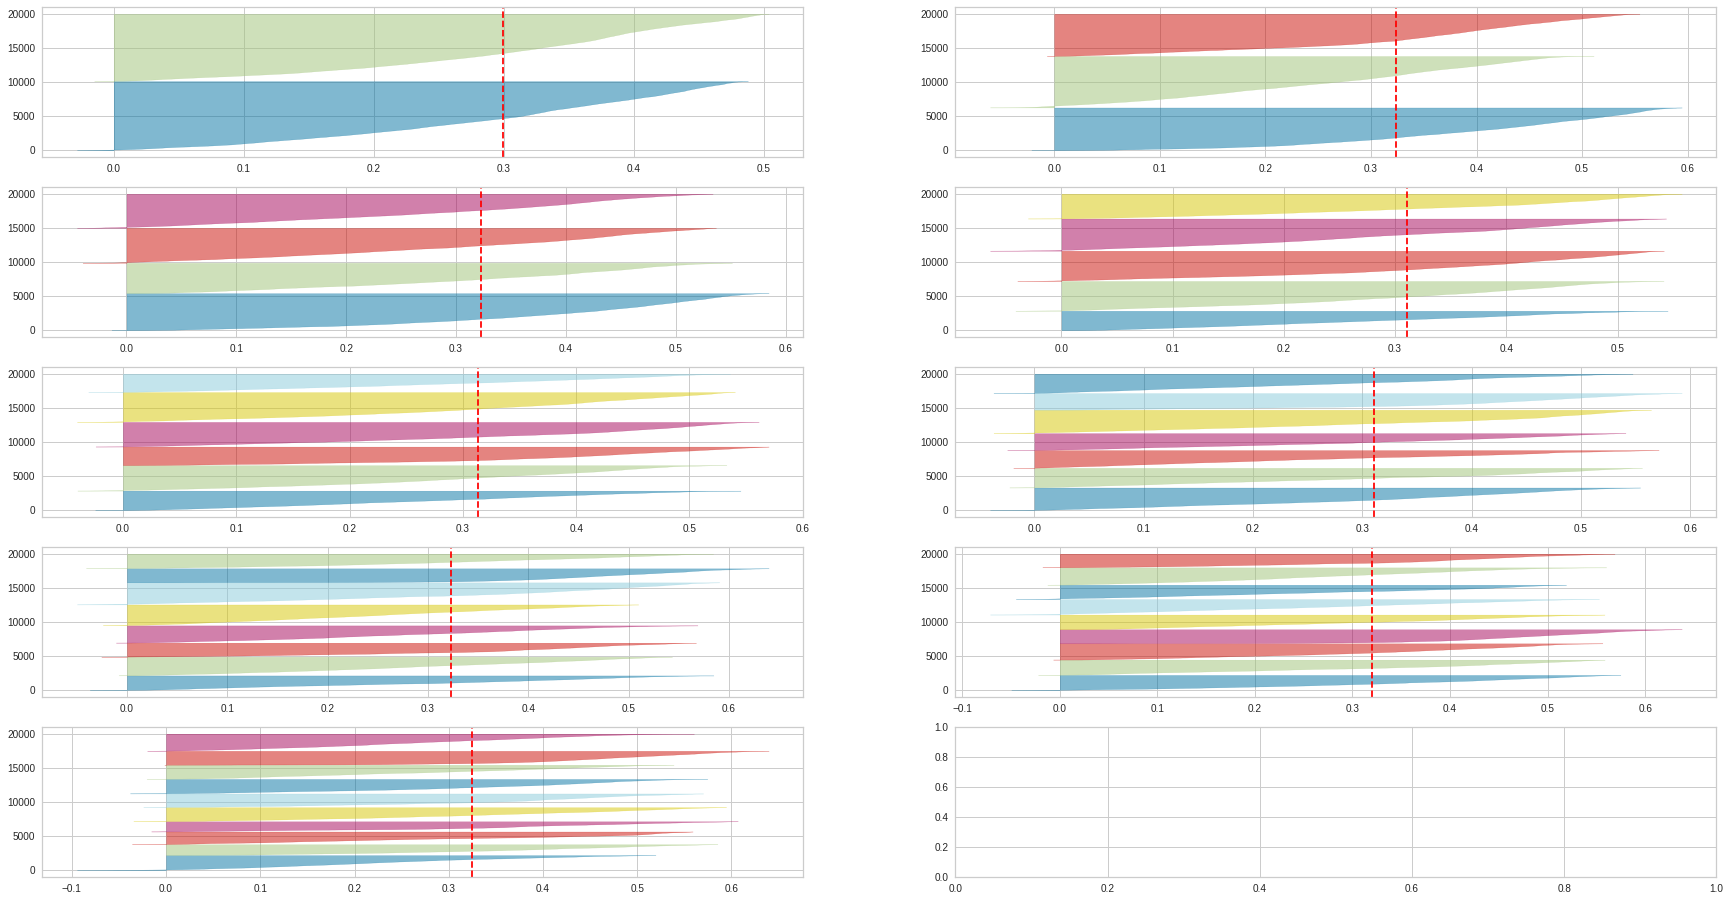

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(5, 2, figsize=(30,16))
for i in [2,3,4,5,6,7,8,9,10]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(T_SNE_Data)

## LDA

In [12]:
# Instantiate the KMeans models
km = KMeans(n_clusters=10, random_state=42)
# Fit the KMeans model
km.fit_predict(LDA_Data)
# Calculate Silhoutte Score
score = silhouette_score(LDA_Data, km.labels_, metric='euclidean')
# Print the score
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.345


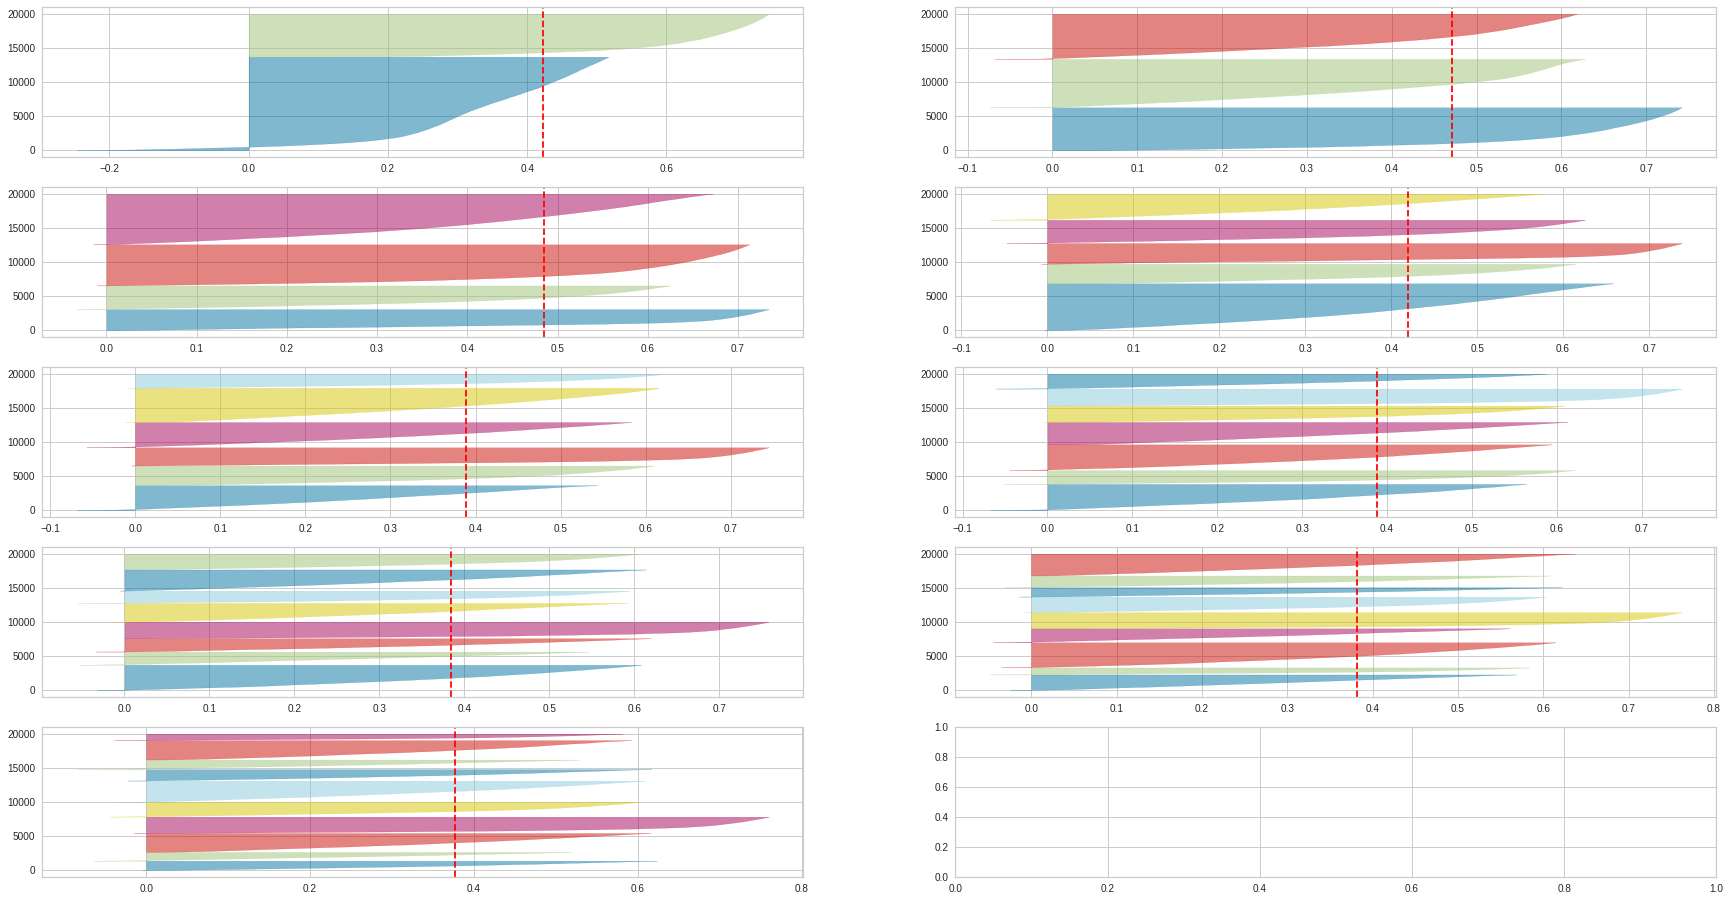

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(5, 2, figsize=(30,16))
for i in [2,3,4,5,6,7,8,9,10]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(LDA_Data)

## LLE

In [13]:
# Instantiate the KMeans models
km = KMeans(n_clusters=10, random_state=42)
# Fit the KMeans model
km.fit_predict(LLE_Data)
# Calculate Silhoutte Score
score = silhouette_score(LLE_Data, km.labels_, metric='euclidean')
# Print the score
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.598


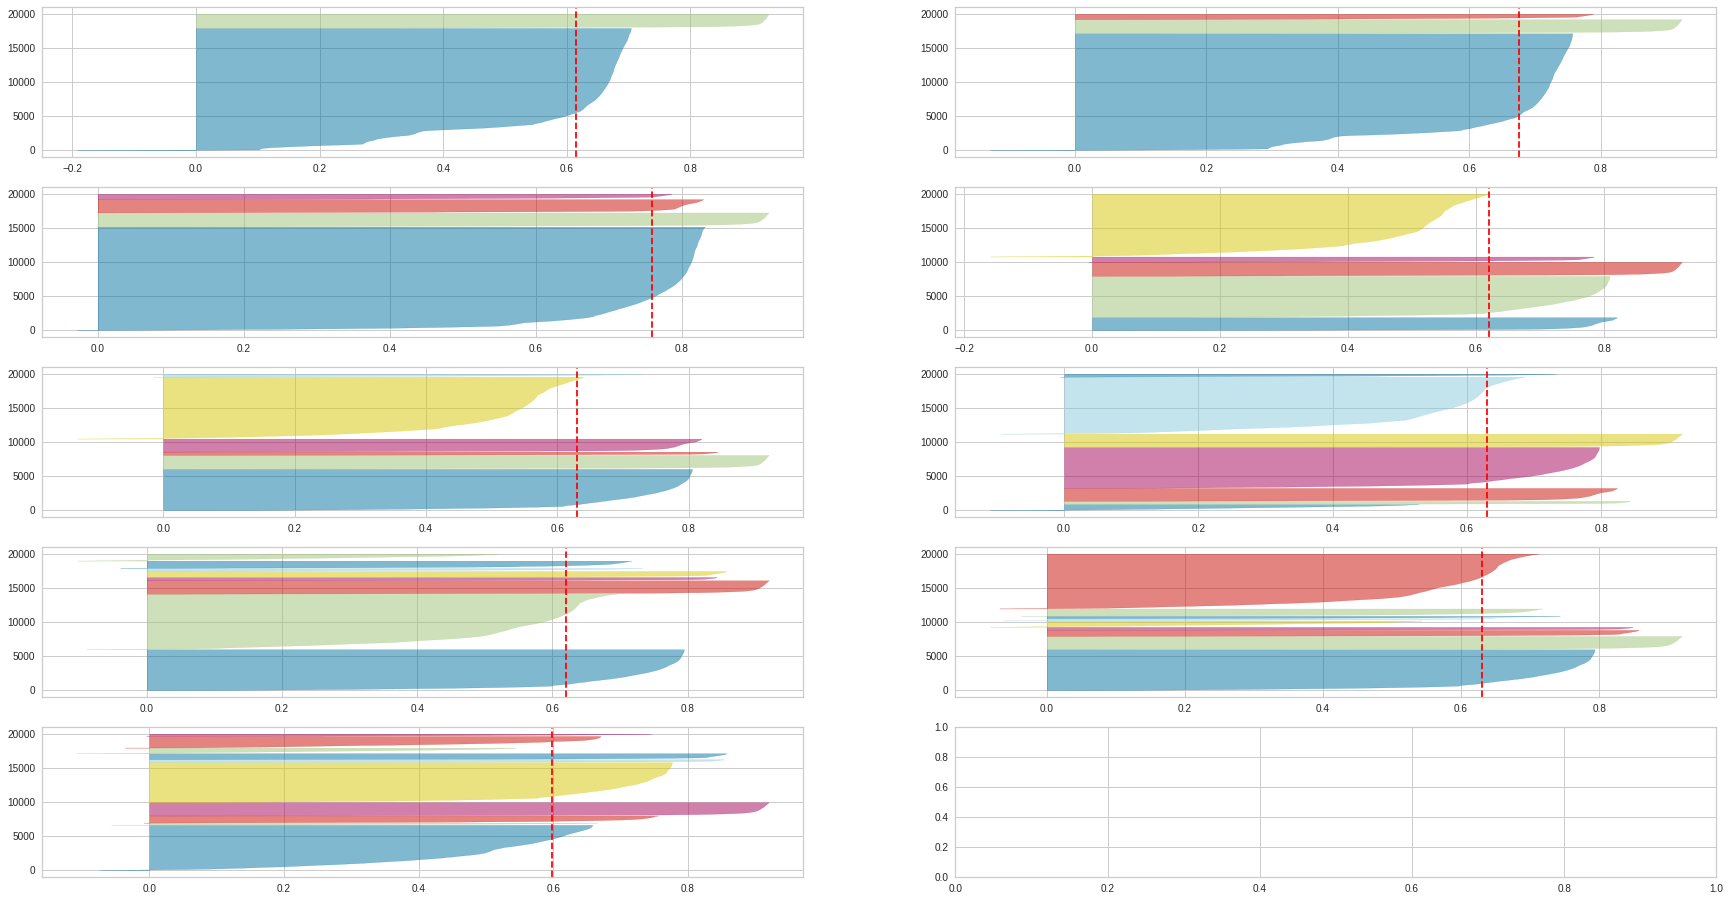

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(5, 2, figsize=(30,16))
for i in [2,3,4,5,6,7,8,9,10]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(LLE_Data)

## Original

In [14]:
# Instantiate the KMeans models
km = KMeans(n_clusters=10, random_state=42)
# Fit the KMeans model
km.fit_predict(x_data)
# Calculate Silhoutte Score
score = silhouette_score(x_data, km.labels_, metric='euclidean')
# Print the score
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.056


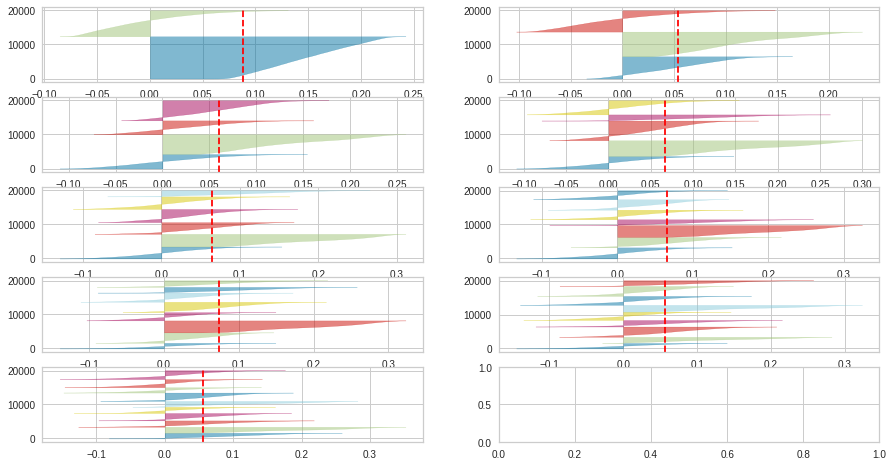

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(5, 2, figsize=(15,8))
for i in [2, 3, 4, 5,6,7,8,9,10]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(x_data)

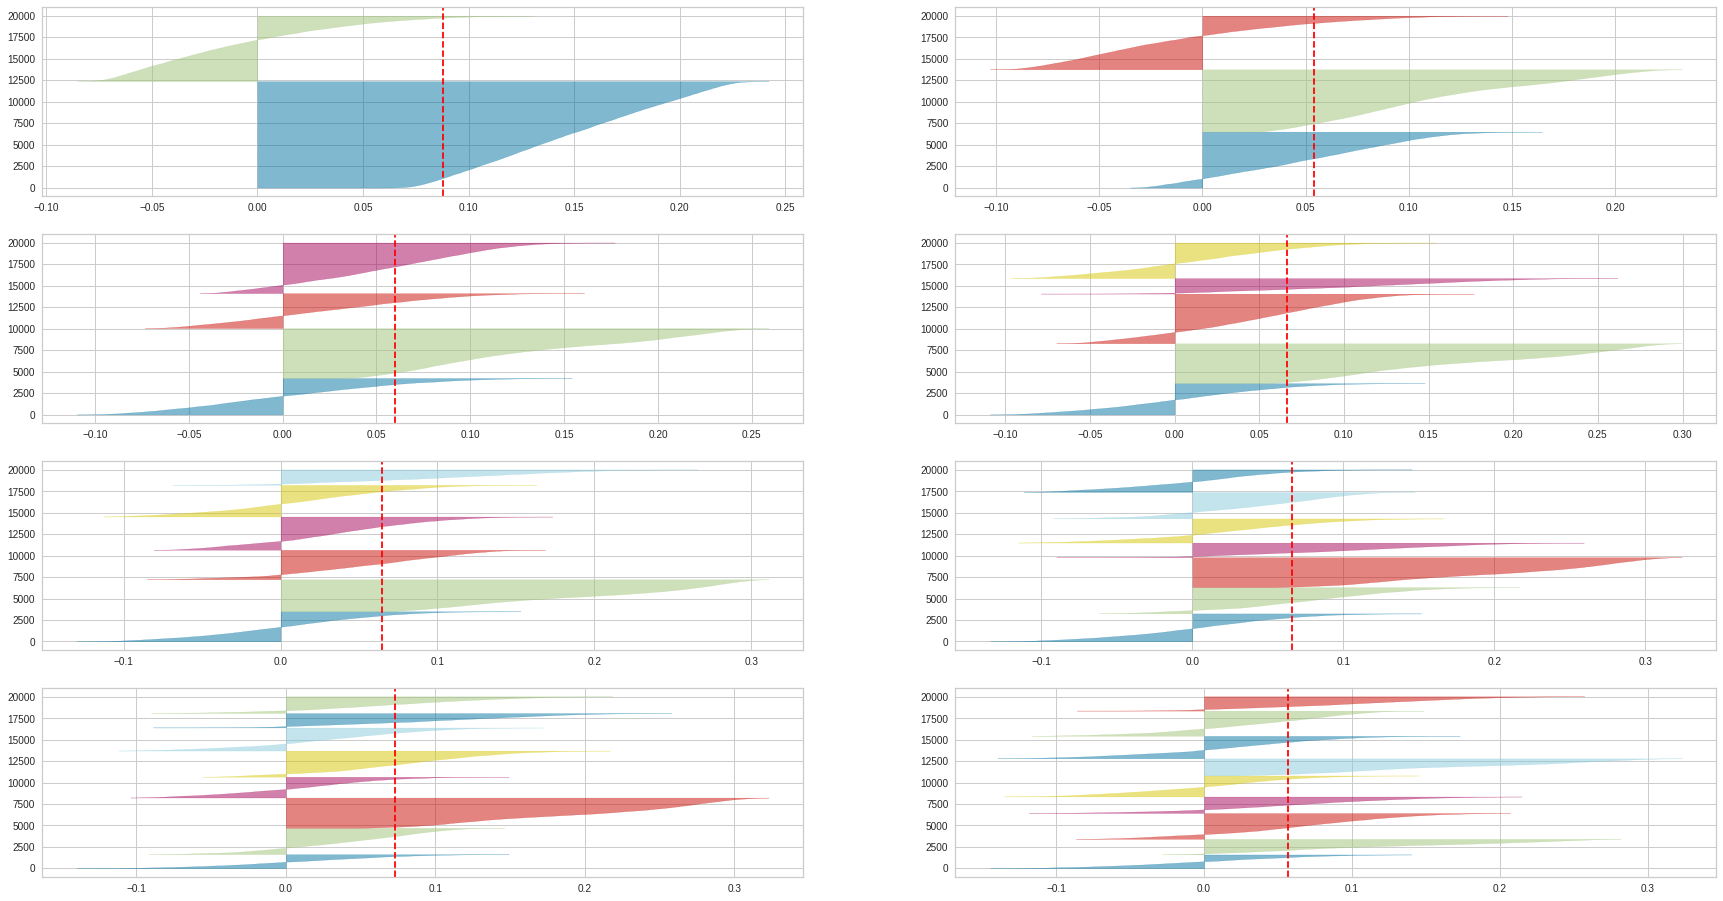

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(4, 2, figsize=(30,16))
for i in [2,3,4,5,6,7,8,9]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(x_data)

In [16]:
# Increment
raw_score = 0.056
lda_score = 0.345
lle_score = 0.598
pca_score = 0.281
tsne_score = 0.324

scores = [lda_score, lle_score, pca_score, tsne_score]

increment_values = []
for index in range(0,len(scores)):
  increment = scores[index] - raw_score
  increment_values.append(increment)

print("LDA: "+str(increment_values[0]))
print("LLE: "+str(increment_values[1]))
print("PCA: "+str(increment_values[2]))
print("TSNE: "+str(increment_values[3]))

LDA: 0.289
LLE: 0.5419999999999999
PCA: 0.22500000000000003
TSNE: 0.268


## First attempt

In [ ]:
# Embeddings
# PCA
print(silhouette_score(X_reduced, y_data, sample_size=19999))
# TSNE
print(silhouette_score(T_SNE_Data, y_data, sample_size=19999))
# LLE
print(silhouette_score(LLE_Data, y_data, sample_size=19999))
# LDA
print(silhouette_score(LDA_Data, y_data, sample_size=19999))

0.0030427490416243697
0.17548427
0.13402770903678976
0.07948873000110195


In [ ]:
# Clusterings
# PCA
print(silhouette_score(y_hc_updated, y_data, sample_size=19999))

-0.3392974094701184


## Hierarchical Clustering & Silhouette Coefficient Analysis

In [ ]:
# Instantiate the HC models
hc = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
# Fit the HC model
hc.fit_predict(x_data)
# Calculate Silhoutte Score
score = silhouette_score(x_data, hc.labels_, metric='euclidean')
# Print the score
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.049


# K-Means Clustering (10 clusters)

## PCA

In [17]:
#Initialize the class object
kmeans = KMeans(n_clusters= 10, init='k-means++', n_init=10, max_iter=100, random_state=42)
 
#predict the labels of clusters.
label = kmeans.fit_predict(X_reduced)
 
print(label)

[8 3 9 ... 1 7 5]


In [18]:
dic = {"number": y_data.to_list(), "cluster": label}
PCA_DF = pd.DataFrame(dic)
PCA_DF

number  cluster
0           5        8
1           7        3
2           9        9
3           5        8
4           2        1
...       ...      ...
19994       0        6
19995       1        0
19996       2        1
19997       9        7
19998       5        5

[19999 rows x 2 columns]

In [20]:
coso1 = PCA_DF.groupby(['number', 'cluster'],as_index=False).size()
#Getting unique labels
u_labels = np.unique(label)

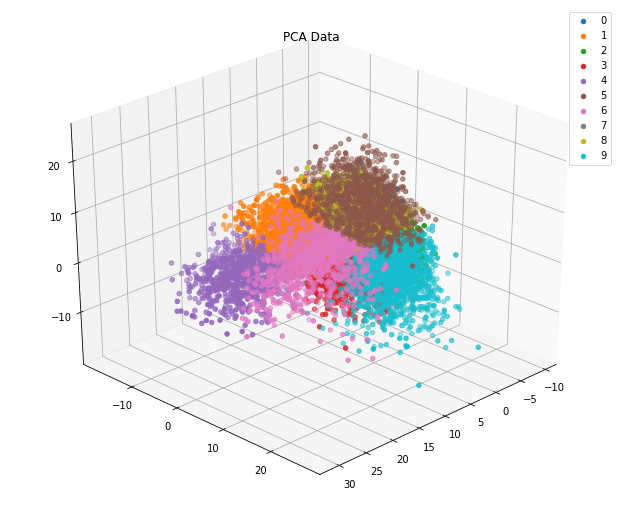

In [21]:
# Plot
XY_plane = 30
Z_rotation = 45

# PCA
fig = plt.figure(figsize=(24,20))
ax = fig.add_subplot(221, projection='3d')
for i in u_labels:
    ax.scatter(X_reduced[label == i , 0] , X_reduced[label == i , 1] , X_reduced[label == i, 2], label = i)
plt.title('PCA Clustering')
ax.view_init(XY_plane, Z_rotation)
ax.legend()
plt.draw()

## TSNE

In [23]:
#Initialize the class object
kmeans = KMeans(n_clusters= 10, init='k-means++', n_init=10, max_iter=100, random_state=42)
 
#predict the labels of clusters.
label_TSNE = kmeans.fit_predict(T_SNE_Data)
 
print(label_TSNE)

[9 1 1 ... 5 0 9]


In [24]:
dic2 = {"number": y_data.to_list(), "cluster": label_TSNE}
TSNE_DF = pd.DataFrame(dic2)
coso2 = TSNE_DF.groupby(['number', 'cluster'],as_index=False).size()
#Getting unique labels
u_labels_TSNE = np.unique(label_TSNE)

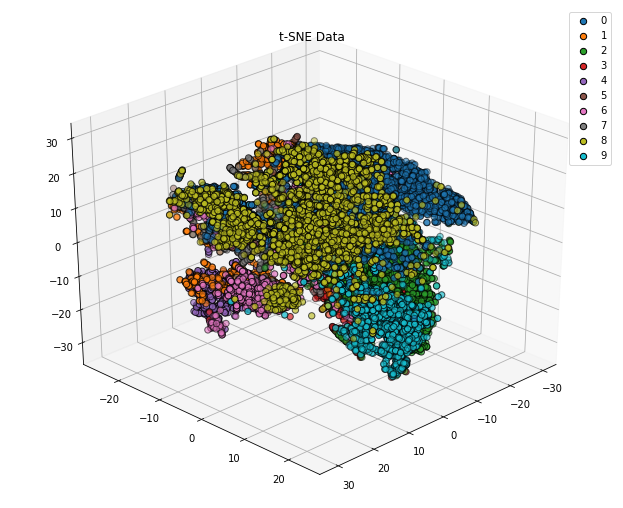

In [25]:
# Plot
XY_plane = 30
Z_rotation = 45

# TSNE
fig = plt.figure(figsize=(24,20))
ax = fig.add_subplot(221, projection='3d')
for i in u_labels_TSNE:
    ax.scatter(T_SNE_Data[label == i , 0] , T_SNE_Data[label == i , 1] , T_SNE_Data[label == i, 2], \
               label = i, cmap=plt.cm.Set1, edgecolor="k", s=40)
plt.title('t-SNE Data')
ax.view_init(XY_plane, Z_rotation)
ax.legend()
plt.draw()

## LDA

In [29]:
#Initialize the class object
kmeans = KMeans(n_clusters= 10, init='k-means++', n_init=10, max_iter=100, random_state=42)
 
#predict the labels of clusters.
label_LDA = kmeans.fit_predict(LDA_Data)
 
print(label_LDA)

[1 2 8 ... 3 8 1]


In [30]:
dic3 = {"number": y_data.to_list(), "cluster": label_LDA}
LDA_DF = pd.DataFrame(dic3)
coso3 = LDA_DF.groupby(['number', 'cluster'],as_index=False).size()
coso3

number  cluster  size
0        0        1   259
1        0        2     2
2        0        3    11
3        0        5  1658
4        0        6    20
..     ...      ...   ...
83       9        5     4
84       9        6     2
85       9        7     1
86       9        8  1236
87       9        9   226

[88 rows x 3 columns]

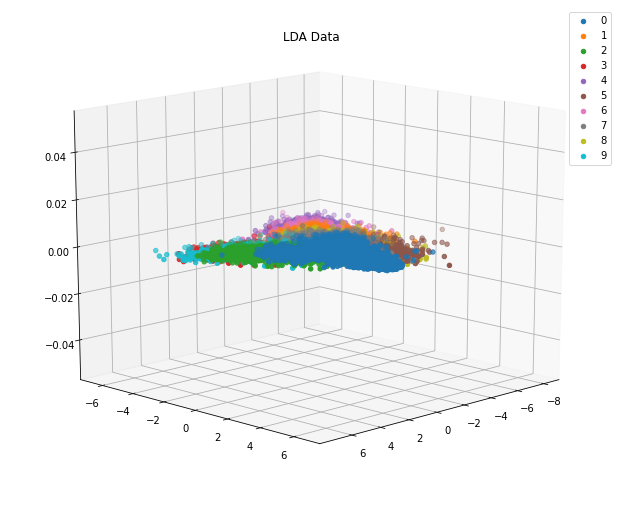

In [31]:
#Getting unique labels
 
u_labels_LDA = np.unique(label_LDA)

# Plot
XY_plane = 15
Z_rotation = 45

# TSNE
fig = plt.figure(figsize=(24,20))
ax = fig.add_subplot(221, projection='3d')
for i in u_labels_LDA:
    ax.scatter(LDA_Data[label == i , 0] , LDA_Data[label == i , 1], LDA_Data[label == i , 2], label = i)
plt.title('LDA Data')
ax.view_init(XY_plane, Z_rotation)
ax.legend()
plt.draw()

## LLE

In [26]:
#Initialize the class object
kmeans = KMeans(n_clusters= 10, init='k-means++', n_init=10, max_iter=100, random_state=42)
 
#predict the labels of clusters.
label_LLE = kmeans.fit_predict(LLE_Data)
 
print(label_LLE)

[0 4 4 ... 7 4 7]


In [27]:
dic4 = {"number": y_data.to_list(), "cluster": label_LLE}
LLE_DF = pd.DataFrame(dic4)
coso4 = LLE_DF.groupby(['number', 'cluster'],as_index=False).size()
coso4

number  cluster  size
0        0        0     6
1        0        1     6
2        0        2     3
3        0        3  1870
4        0        4     1
..     ...      ...   ...
81       9        3     6
82       9        4  1930
83       9        7    13
84       9        8     2
85       9        9     2

[86 rows x 3 columns]

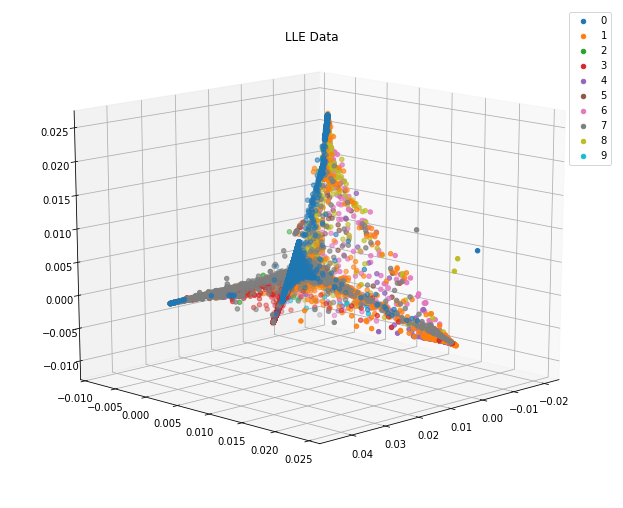

In [28]:
#Getting unique labels
 
u_labels_LLE = np.unique(label_LLE)

# Plot
XY_plane = 15
Z_rotation = 45

# TSNE
fig = plt.figure(figsize=(24,20))
ax = fig.add_subplot(221, projection='3d')
for i in u_labels_LLE:
    ax.scatter(LLE_Data[label == i , 0] , LLE_Data[label == i , 1], LLE_Data[label == i , 2], label = i)
plt.title('LLE Data')
ax.view_init(XY_plane, Z_rotation)
ax.legend()
plt.draw()

# K-Means Clustering (10 clusters)

In [34]:
#Initialize the class object
kmeans = KMeans(n_clusters= 10, init='k-means++', n_init=10, max_iter=100, random_state=42)
 
#predict the labels of clusters.
label_TSNE = kmeans.fit_predict(T_SNE_Data)

print(label_TSNE)

[9 1 1 ... 5 0 9]


In [35]:
TSNE_u_labels = np.unique(label_TSNE)
TSNE_u_labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [36]:
dic2 = {"number": y_data.to_list(), "cluster": label_TSNE}
TSNE_DF = pd.DataFrame(dic2)
coso2 = TSNE_DF.groupby(['number', 'cluster'],as_index=False).size()
coso2

number  cluster  size
0        0        1     3
1        0        2     2
2        0        3    15
3        0        4     8
4        0        5    13
..     ...      ...   ...
89       9        5     8
90       9        6   788
91       9        7    13
92       9        8    12
93       9        9    30

[94 rows x 3 columns]

In [ ]:
coso2['cluster'] = 'c' + coso2['cluster'].astype(str)
coso2

number cluster  size
0        0      c1     3
1        0      c2     2
2        0      c3    15
3        0      c4     8
4        0      c5    13
..     ...     ...   ...
89       9      c5     8
90       9      c6   788
91       9      c7    13
92       9      c8    12
93       9      c9    30

[94 rows x 3 columns]

In [ ]:
tsne_labels = coso2['cluster']
tsne_labels

0     c1
1     c2
2     c3
3     c4
4     c5
      ..
89    c5
90    c6
91    c7
92    c8
93    c9
Name: cluster, Length: 94, dtype: object

In [ ]:
TSNE1_u_labels = np.unique(tsne_labels)
TSNE1_u_labels

array(['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9'],
      dtype=object)

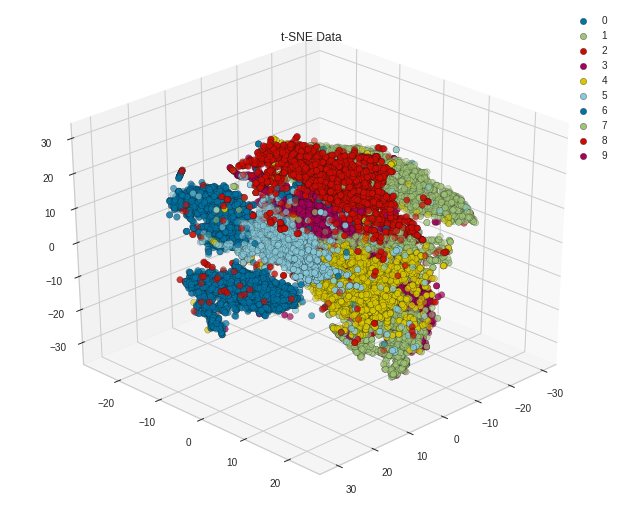

In [ ]:
# Plot
XY_plane = 30
Z_rotation = 45

# TSNE
fig = plt.figure(figsize=(24,20))
ax = fig.add_subplot(221, projection='3d')
for i in TSNE_u_labels:
    ax.scatter(T_SNE_Data[label == i , 0] , T_SNE_Data[label == i , 1] , T_SNE_Data[label == i, 2], label = i, cmap=plt.cm.Set1, edgecolor="k", s=40)
plt.title('t-SNE Data')
ax.view_init(XY_plane, Z_rotation)
ax.legend()
plt.draw()

# Plot figure clusterings

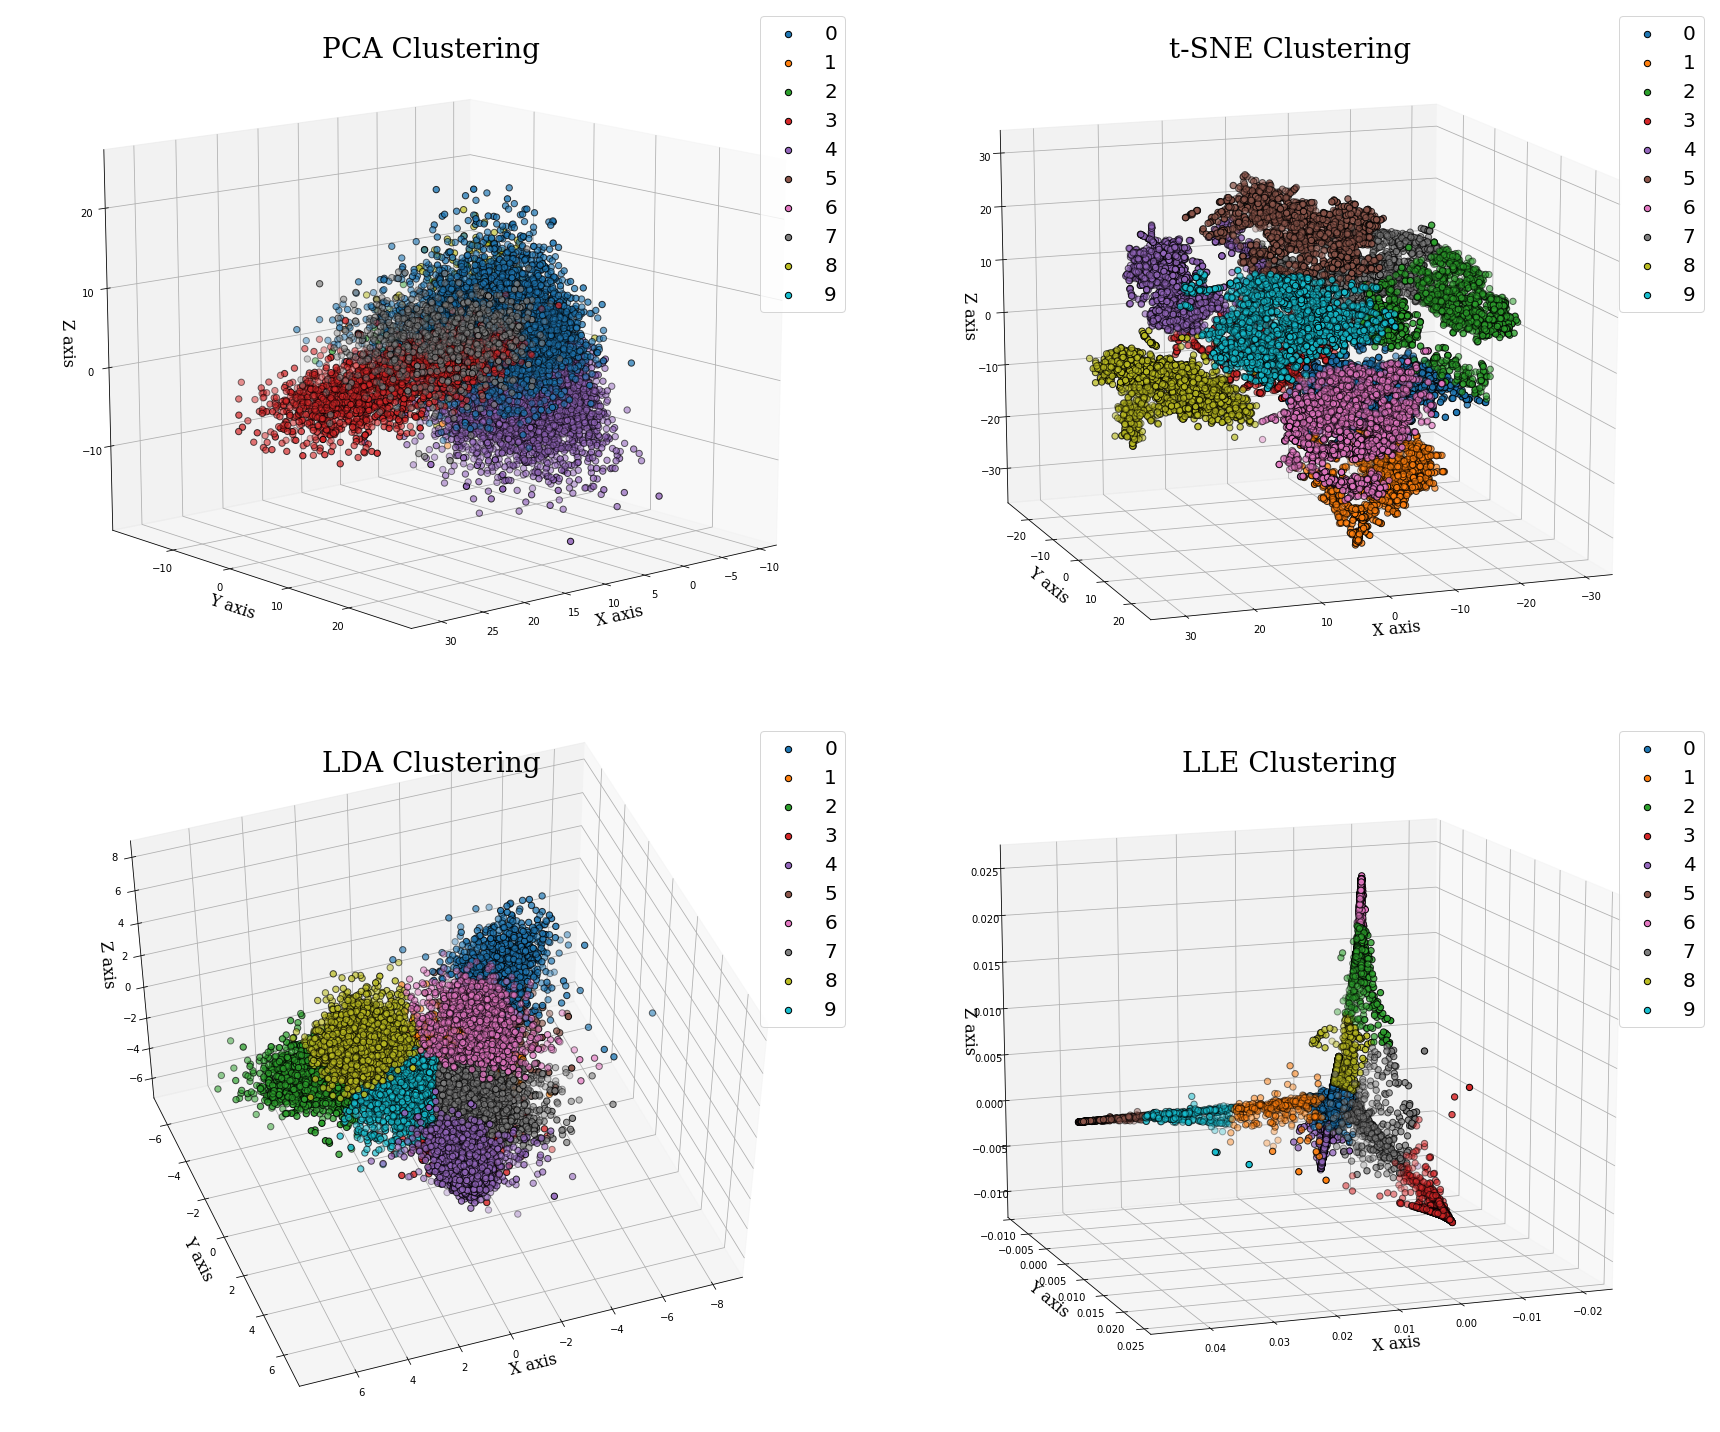

In [39]:
# Plot figure clusterings

from numpy.ma.core import size
# Plot
XY_plane = 15
Z_rotation = 70#45

XY_plane1 = 15
Z_rotation1 = 50

XY_plane2 = 50
Z_rotation2 = 70#45

font_titles = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 28,
        }

font_axis = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

font_text = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }

# PCA
fig = plt.figure(figsize=(24,20))
ax = fig.add_subplot(221, projection='3d')
for i in u_labels:
    ax.scatter(X_reduced[label == i , 0] , X_reduced[label == i , 1] , X_reduced[label == i, 2], label = i,\
               cmap=plt.cm.Set1, edgecolor="k", s=40)
ax.legend(prop={'size':20})
plt.title('PCA Clustering', fontdict=font_titles)
#ax.text(35,-10, 30, "$\sigma²$ = [0.05 0.04 0.03]", color='black', fontdict=font_text)
ax.view_init(XY_plane1, Z_rotation1)
ax.set_xlabel('X axis', fontdict=font_axis)
ax.set_ylabel('Y axis', fontdict=font_axis)
ax.set_zlabel('Z axis', fontdict=font_axis)
plt.draw()

# TSNE
ax_1 = fig.add_subplot(222, projection='3d')
label = label_TSNE
for i in u_labels_TSNE:
    ax_1.scatter(T_SNE_Data[label == i , 0] , T_SNE_Data[label == i , 1] , T_SNE_Data[label == i, 2], \
               label = i, cmap=plt.cm.Set1, edgecolor="k", s=40)
ax_1.legend(prop={'size':20})
plt.title('t-SNE Clustering', fontdict=font_titles)
#ax_1.text(35,-10, 40, "KL = 1.8", color='black', fontdict=font_text)
ax_1.view_init(XY_plane, Z_rotation)
ax_1.set_xlabel('X axis', fontdict=font_axis)
ax_1.set_ylabel('Y axis', fontdict=font_axis)
ax_1.set_zlabel('Z axis', fontdict=font_axis)
plt.draw()

# LDA
label = label_LDA
ax_3 = fig.add_subplot(223, projection='3d')
for i in u_labels_LDA:
    ax_3.scatter(LDA_Data[label == i , 0] , LDA_Data[label == i , 1], LDA_Data[label == i , 2], \
               label = i, cmap=plt.cm.Set1, edgecolor="k", s=40)
ax_3.legend(prop={'size':20})
plt.title('LDA Clustering', fontdict=font_titles)
#ax_3.text(8,-4, 0.07, "$\sigma²$ = [0.24 0.20 0.18]", color='black', fontdict=font_text)
ax_3.view_init(XY_plane2, Z_rotation2)
ax_3.set_xlabel('X axis', fontdict=font_axis)
ax_3.set_ylabel('Y axis', fontdict=font_axis)
ax_3.set_zlabel('Z axis', fontdict=font_axis)
plt.draw()

# LLE
label = label_LLE
ax_2 = fig.add_subplot(224, projection='3d')
for i in u_labels_LLE:
    ax_2.scatter(LLE_Data[label == i , 0] , LLE_Data[label == i , 1], LLE_Data[label == i , 2], \
               label = i, cmap=plt.cm.Set1, edgecolor="k", s=40)
ax_2.legend(prop={'size':20})
plt.title('LLE Clustering', fontdict=font_titles)
#ax_2.text(0.04,-0.010, 0.03, "reconstruction-error = $6.13x10^{-07}$", color='black', fontdict=font_text)
ax_2.view_init(XY_plane, Z_rotation)
ax_2.set_xlabel('X axis', fontdict=font_axis)
ax_2.set_ylabel('Y axis', fontdict=font_axis)
ax_2.set_zlabel('Z axis', fontdict=font_axis)
plt.draw()
plt.tight_layout()
plt.show()


path_results = "/content/drive/MyDrive/📚-MBCI/Semestre 1/Matemáticas y Estadística/mnist/Results/"
fig.savefig(path_results + 'Clusterings', bbox_inches='tight')

# Attempts

## PCA - 2D Visualization

In [ ]:
# Pick first 15K data-points to work on for time-effeciency.
#Excercise: Perform the same analysis on all of 42K data-points.

labels = l.head(15000)
data = d.head(15000)

print("the shape of sample data = ", data.shape)

the shape of sample data =  (15000, 784)


In [ ]:
# Data-preprocessing: Standardizing the data
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html


standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


In [ ]:
#find the co-variance matrix which is : A^T * A
sample_data = standardized_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T , sample_data)

print ( "The shape of variance matrix = ", covar_matrix.shape)

The shape of variance matrix =  (784, 784)


In [ ]:
# finding the top two eigen-values and corresponding eigen-vectors 
# for projecting onto a 2-Dim space.
#https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.linalg.eigh.html

# the parameter 'eigvals' is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783)(index) eigenvalues.
values, vectors = eigh(covar_matrix, eigvals=(782,783))

print("Shape of eigen vectors = ",vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T

print("Updated shape of eigen vectors = ",vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


In [ ]:
# projecting the original data sample on the plane 
#formed by two principal eigen vectors by vector-vector multiplication.

new_coordinates = np.matmul(vectors, sample_data.T)

print (" resultanat new data points' shape ", vectors.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)

 resultanat new data points' shape  (2, 784) X (784, 15000)  =  (2, 15000)


In [ ]:

# appending label to the 2d projected data(vertical stack)
new_coordinates = np.vstack((new_coordinates, labels)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())
#(0,1,2,3,4 are Xi other are principal axis)

   1st_principal  2nd_principal  label
0       1.224373       1.925086    5.0
1      -2.290766       3.684237    7.0
2       9.109738       2.536526    9.0
3       4.699558       3.824095    5.0
4      -6.387078       4.150690    2.0


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


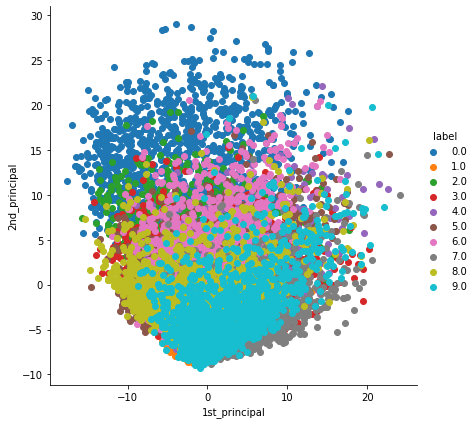

In [ ]:
# ploting the 2d data points with seaborn
sn.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

## PCA

In [ ]:
# initializing the pca
pca = decomposition.PCA()

In [ ]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (15000, 2)


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


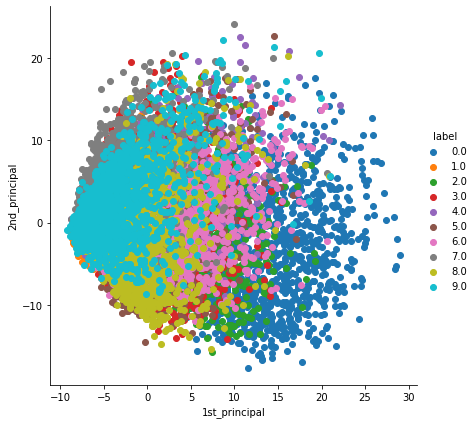

In [ ]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, labels)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()


## t-SNE using Scikit-Learn

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


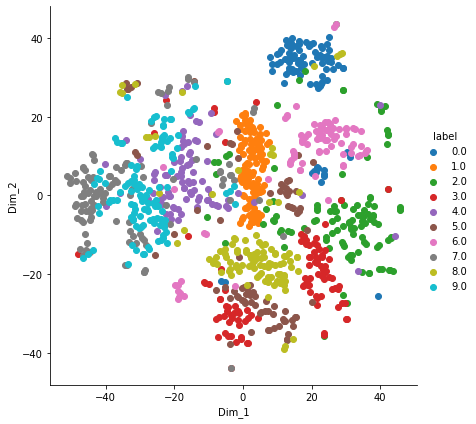

In [ ]:
# TSNE
#https://distill.pub/2016/misread-tsne/



# Picking the top 1000 points as TSNE takes a lot of time for 15K points
data_1000 = standardized_data[0:1000,:]
labels_1000 = labels[0:1000]

model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data_1000)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


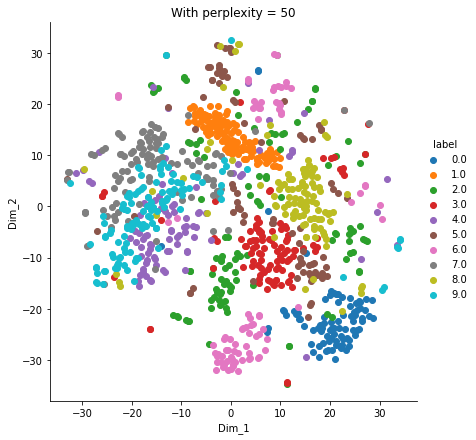

In [ ]:
model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()

## Editing perplexity parameter

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


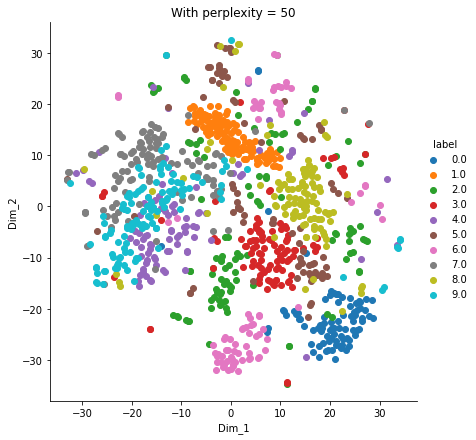

In [ ]:
model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


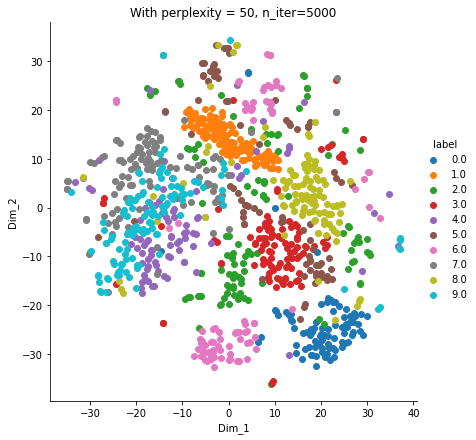

In [ ]:
model = TSNE(n_components=2, random_state=0, perplexity=50,  n_iter=5000)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, n_iter=5000')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


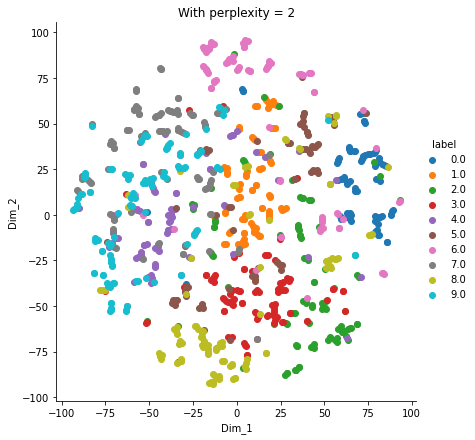

In [ ]:
model = TSNE(n_components=2, random_state=0, perplexity=2)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 2')
plt.show()

## LLE

In [ ]:

LLE = manifold.LocallyLinearEmbedding(n_components=2, n_neighbors=5,eigen_solver="auto")
LLE_Data = LLE.fit_transform(data_1000)

In [ ]:
# creating a new data fram which help us in ploting the result data
LLE_Data = np.vstack((LLE_Data.T, labels_1000)).T
LLE_DF = pd.DataFrame(data=LLE_Data, columns=("Dim_1", "Dim_2", "label"))

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


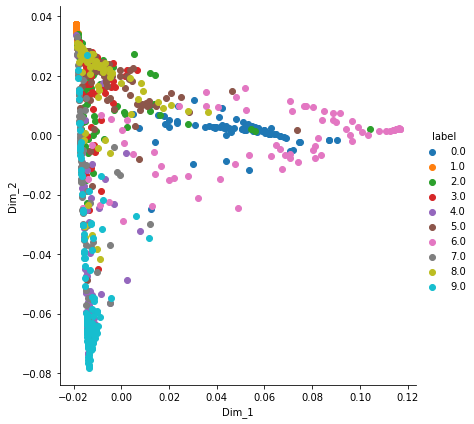

In [ ]:
# Ploting the result of tsne
sn.FacetGrid(LLE_DF, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

## LDA

In [ ]:

LDA_low = LDA(n_components=2)
LDA_Data = LDA_low.fit_transform(data_1000, labels_1000)

In [ ]:
# creating a new data fram which help us in ploting the result data
LDA_Data = np.vstack((LDA_Data.T, labels_1000)).T
LDA_DF = pd.DataFrame(data=LDA_Data, columns=("Dim_1", "Dim_2", "Dim_3", "label"))

ValueError: ignored

# Notes

Objetivos:
1. ¿Qué manifold es mejor? Con base en las medidas de varianza
2. Formato de artículo 
 * Metodología 
 * Resultados (si 2D, gira las proyecciones. Si 3D, te evitas girarlas)
 * Discusión (ver con cuál conglomeran mejor los centroides (buscar una métrica: silhouette - aplicar método de CLUSTERING e.g. jerárquico o k-means))
  * ¿Cuánta información estás plasmando en esos 3 ejes? Las componentes principales no están siendo un discriminante adecuado, necesitamos algo más
 * Conclusión (qué método es mejor)

Métodos que respaldan la presentación de los resultados:
- silhouette
- lo que digo va respaldado por literatura o mediciones

* LDA better than PCA:
https://sci-hub.mksa.top/10.1007/978-981-15-1059-5
c10